In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# ASD-ABA 1000 posts subsample - only sentiment

In [2]:
filepath = 'data/aba_posts_re_labeled_cleaned_.csv'
data = pd.read_csv(filepath)
data.head(3)

,Document,sentiment,other,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Pozitive,True,False,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          974 non-null    object
 1   sentiment         974 non-null    object
 2   other             974 non-null    bool  
 3   aba professional  974 non-null    bool  
 4   parent            974 non-null    bool  
 5   asd               974 non-null    bool  
dtypes: bool(4), object(2)
memory usage: 19.1+ KB


In [4]:
sentiment_df = data.drop(columns=['other', 'aba professional', 'parent', 'asd'], axis=1)
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   974 non-null    object
 1   sentiment  974 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


## train-validation-test split 

In [5]:
# data was cleaned previously in the project
# split data into train and test sets
from sklearn.model_selection import train_test_split

# split the data into 80% training and 20% for testing
sentiment_df_temp, sentiment_df_test = train_test_split(sentiment_df, test_size=0.2, random_state=7, stratify=sentiment_df['sentiment'])

# further splitting the training data into 20% validation and 80% training
sentiment_df_train, sentiment_df_val = train_test_split(sentiment_df_temp, test_size=0.2, random_state=7, stratify=sentiment_df_temp['sentiment'])

sentiment_df_train.shape, sentiment_df_val.shape, sentiment_df_test.shape


((623, 2), (156, 2), (195, 2))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset(dataset, title, color):
    counts = dataset.value_counts()

    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind='bar', color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Number of posts')

    # add legend with value counts
    for i, v in enumerate(counts):
        ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')
    plt.show()

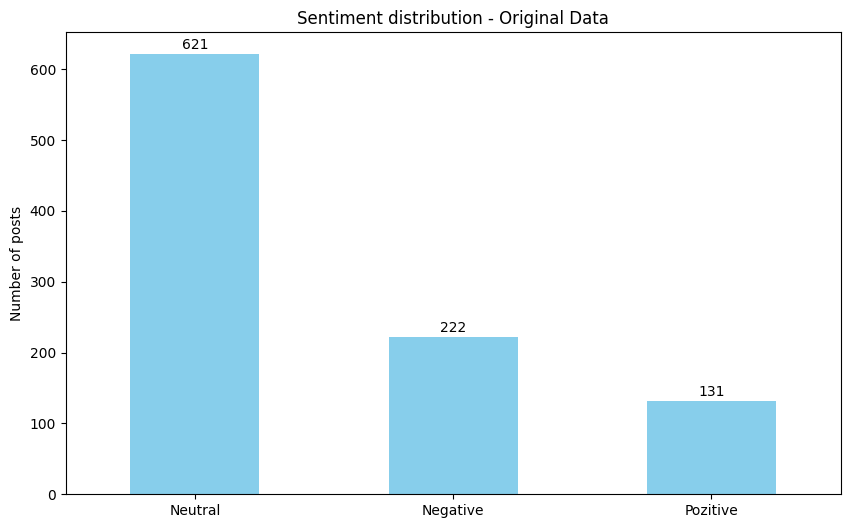

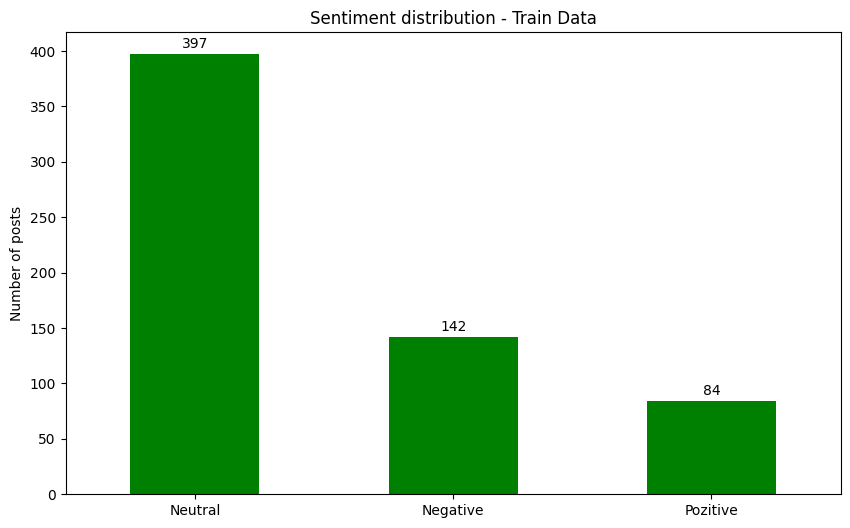

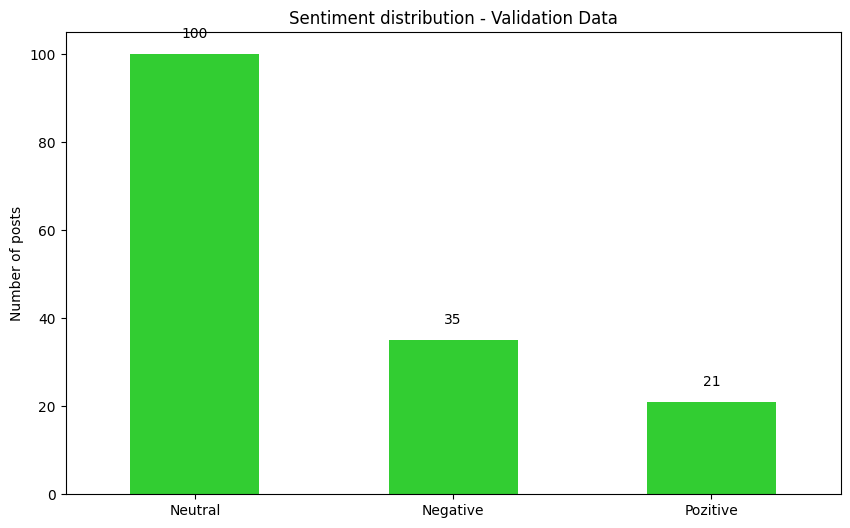

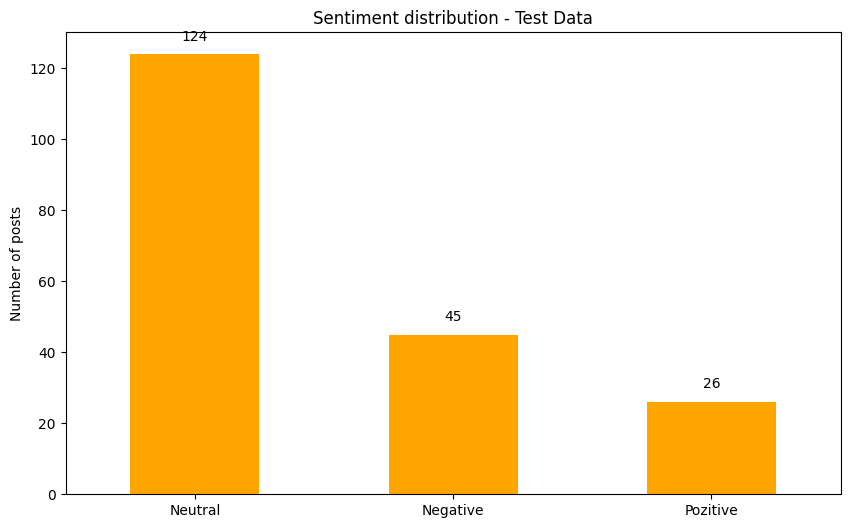

In [7]:
plot_dataset(sentiment_df['sentiment'], 'Sentiment distribution - Original Data', 'skyblue')
plot_dataset(sentiment_df_train['sentiment'], 'Sentiment distribution - Train Data', 'green')
plot_dataset(sentiment_df_val['sentiment'], 'Sentiment distribution - Validation Data', 'limegreen')
plot_dataset(sentiment_df_test['sentiment'], 'Sentiment distribution - Test Data', 'orange')

In [8]:
# save subsets as csv files
sentiment_df_train.to_csv('data/data_sentiment/sentiment_data_train_sm.csv')
sentiment_df_val.to_csv('data/data_sentiment/sentiment_data_val_sm.csv')
sentiment_df_test.to_csv('data/data_sentiment/sentiment_data_test_sm.csv')

## Author

In [9]:
author_df = data.drop(columns=['sentiment'], axis=1)
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          974 non-null    object
 1   other             974 non-null    bool  
 2   aba professional  974 non-null    bool  
 3   parent            974 non-null    bool  
 4   asd               974 non-null    bool  
dtypes: bool(4), object(1)
memory usage: 11.5+ KB


In [10]:
def plot_dataset_multilabel(dataset, title, color):
    # counts = dataset.value_counts()
    counts = dict()

    # get the true counts for each col
    for col in dataset.columns:
        value_counts = dataset[col].value_counts()
        counts[col] = value_counts[True]

    plt.figure(figsize=(10, 6))
    ax = pd.Series(counts).plot(kind='bar', color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Number of posts')

    # add legend with value counts
    for i, (col, v) in enumerate(counts.items()):
        ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')
    plt.show()

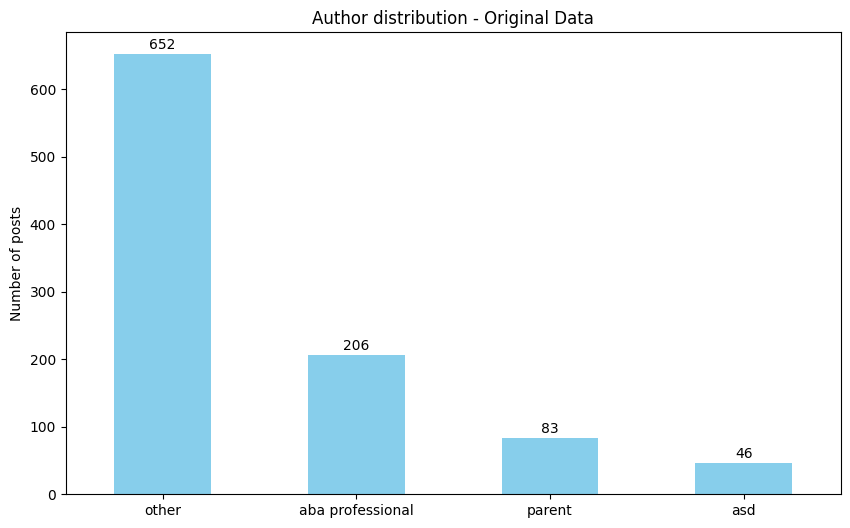

In [12]:
plot_dataset_multilabel(author_df.drop(columns=['Document'], axis=1), 'Author distribution - Original Data', 'skyblue')
